Ссылка на данные
https://data.cdc.gov/Vaccinations/COVID-19-Vaccinations-in-the-United-States-County/8xkx-amqh

По ссылке дана таблица и описание данных COVID-19 Vaccinations in the United States. Из таблицы для построения регрессии каждый студент согласно списку выбирает по 500 строк, т.е. 1-й студент 1-500 строки, 2-й 501-1000 строки, 3-й 1001-1500 и т.д. Необходимо:

1. Построить регрессию MMWR_week от остальных параметров и регрессию Series_Complete_Pop_Pct от остальных факторов
2. привести статистику данных
3. корреляционную матрицу
4. графики scatter
5. доверительные интервалы для коэффициентов
6. проверить на гетероскедастичность
7. проверить необходимость построения 2-х и более регрессий (неоднородная зависимость)
- показать метрики регрессии сравнить линейную и нелинейные регрессии

In [41]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms

# построение регрессий
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# проверка на гетероскедастичность
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white

In [42]:
N = 39 # номер в общем списке группы
data = pd.read_csv('COVID-19_Vaccinations_in_the_United_States_County.csv')[N * 500 : N * 500 + 500]
data.head()

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,...,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity
19500,10/25/2021,72079,43,Lajas Municipio,PR,69.9,15376,15373.0,78.3,14224,...,D,16.0,16.0,16.0,16.0,Metro,4.0,4.0,4.0,4.0
19501,10/25/2021,48393,43,Roberts County,TX,29.3,250,250.0,33.9,241,...,A,1.0,2.0,2.0,3.0,Non-metro,5.0,6.0,6.0,7.0
19502,10/25/2021,28129,43,Smith County,MS,30.1,4789,4789.0,35.2,4526,...,B,6.0,6.0,6.0,7.0,Non-metro,6.0,6.0,6.0,7.0
19503,10/25/2021,13175,43,Laurens County,GA,24.4,11590,11589.0,29.1,10732,...,D,13.0,13.0,13.0,14.0,Non-metro,5.0,5.0,5.0,6.0
19504,10/25/2021,40123,43,Pontotoc County,OK,46.0,17611,17611.0,55.0,16686,...,C,11.0,12.0,12.0,12.0,Non-metro,7.0,8.0,8.0,8.0


In [43]:
data = data.select_dtypes(["float64", "int64"]).dropna()

# 1. Построить регрессию MMWR_week от остальных параметров

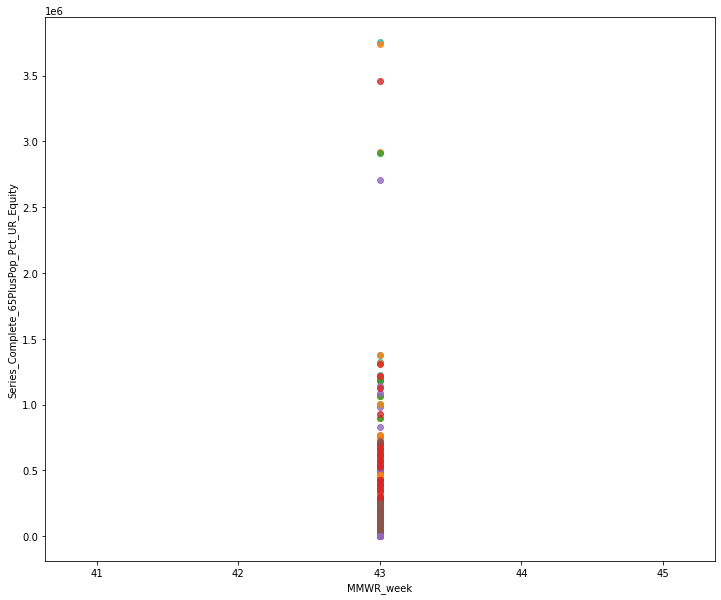

In [44]:
plt.figure(figsize=(12, 10))

for col in data.drop("MMWR_week", axis=1):
    sns.regplot(data=data, x="MMWR_week", y=col)

# 2. Построить регрессию Series_Complete_Pop_Pct от остальных параметров

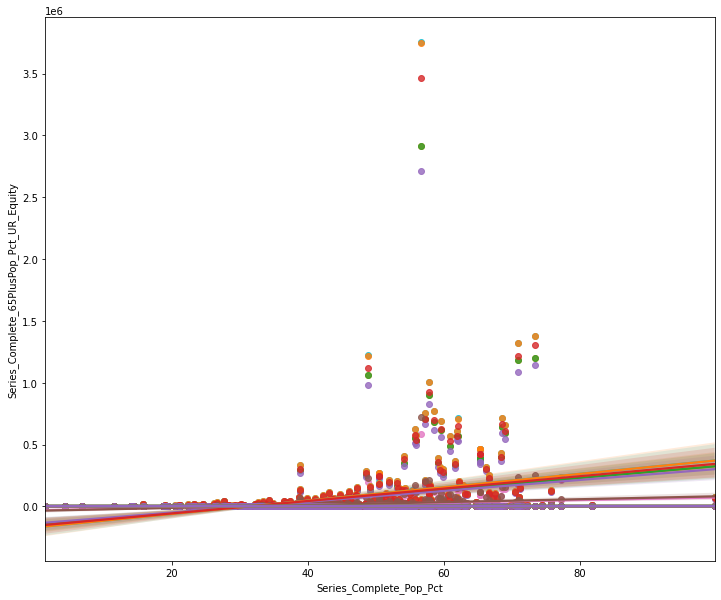

In [45]:
plt.figure(figsize=(12, 10))

for col in data.drop("Series_Complete_Pop_Pct", axis=1):
    sns.regplot(data=data, x="Series_Complete_Pop_Pct", y=col)

#  3. Привести статистику данных

In [46]:
data.describe()

,MMWR_week,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Completeness_pct,...,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity
count,459.0,459.000000,4.590000e+02,4.590000e+02,459.000000,4.590000e+02,459.000000,459.000000,459.000000,459.000000,...,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000
mean,43.0,44.315686,6.143075e+04,6.138136e+04,51.597821,5.726170e+04,53.645316,14713.422658,73.190414,93.133551,...,16539.577342,79.662963,9.026144,9.474946,9.586057,9.749455,5.296296,5.745098,5.856209,6.019608
std,0.0,13.017329,1.952584e+05,1.949470e+05,14.775846,1.812697e+05,14.767279,39973.500713,16.478500,10.064318,...,46968.887230,17.169759,4.369827,4.419701,4.432253,4.415680,1.893279,1.926134,1.957245,1.955188
min,43.0,1.300000,1.380000e+02,1.380000e+02,1.500000,1.370000e+02,1.600000,47.000000,2.900000,57.800000,...,52.000000,4.400000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,43.0,36.350000,4.588000e+03,4.587500e+03,42.400000,4.436500e+03,44.650000,1544.500000,66.700000,93.900000,...,1722.000000,72.800000,5.000000,5.000000,6.000000,7.000000,4.000000,4.000000,4.000000,4.000000
50%,43.0,43.900000,1.140600e+04,1.140500e+04,51.300000,1.079000e+04,53.700000,3541.000000,75.600000,96.600000,...,3841.000000,82.400000,10.000000,10.000000,10.000000,11.000000,6.000000,6.000000,7.000000,7.000000
75%,43.0,52.200000,3.466200e+04,3.463450e+04,61.350000,3.297500e+04,63.100000,10328.500000,83.750000,97.900000,...,11047.000000,91.400000,13.000000,13.000000,13.000000,13.000000,7.000000,7.000000,8.000000,8.000000
max,43.0,99.900000,2.916700e+06,2.910146e+06,99.900000,2.708237e+06,99.900000,584210.000000,99.900000,99.100000,...,722728.000000,99.900000,16.000000,16.000000,16.000000,16.000000,8.000000,8.000000,8.000000,8.000000


# 4. Построить корреляционную матрицу

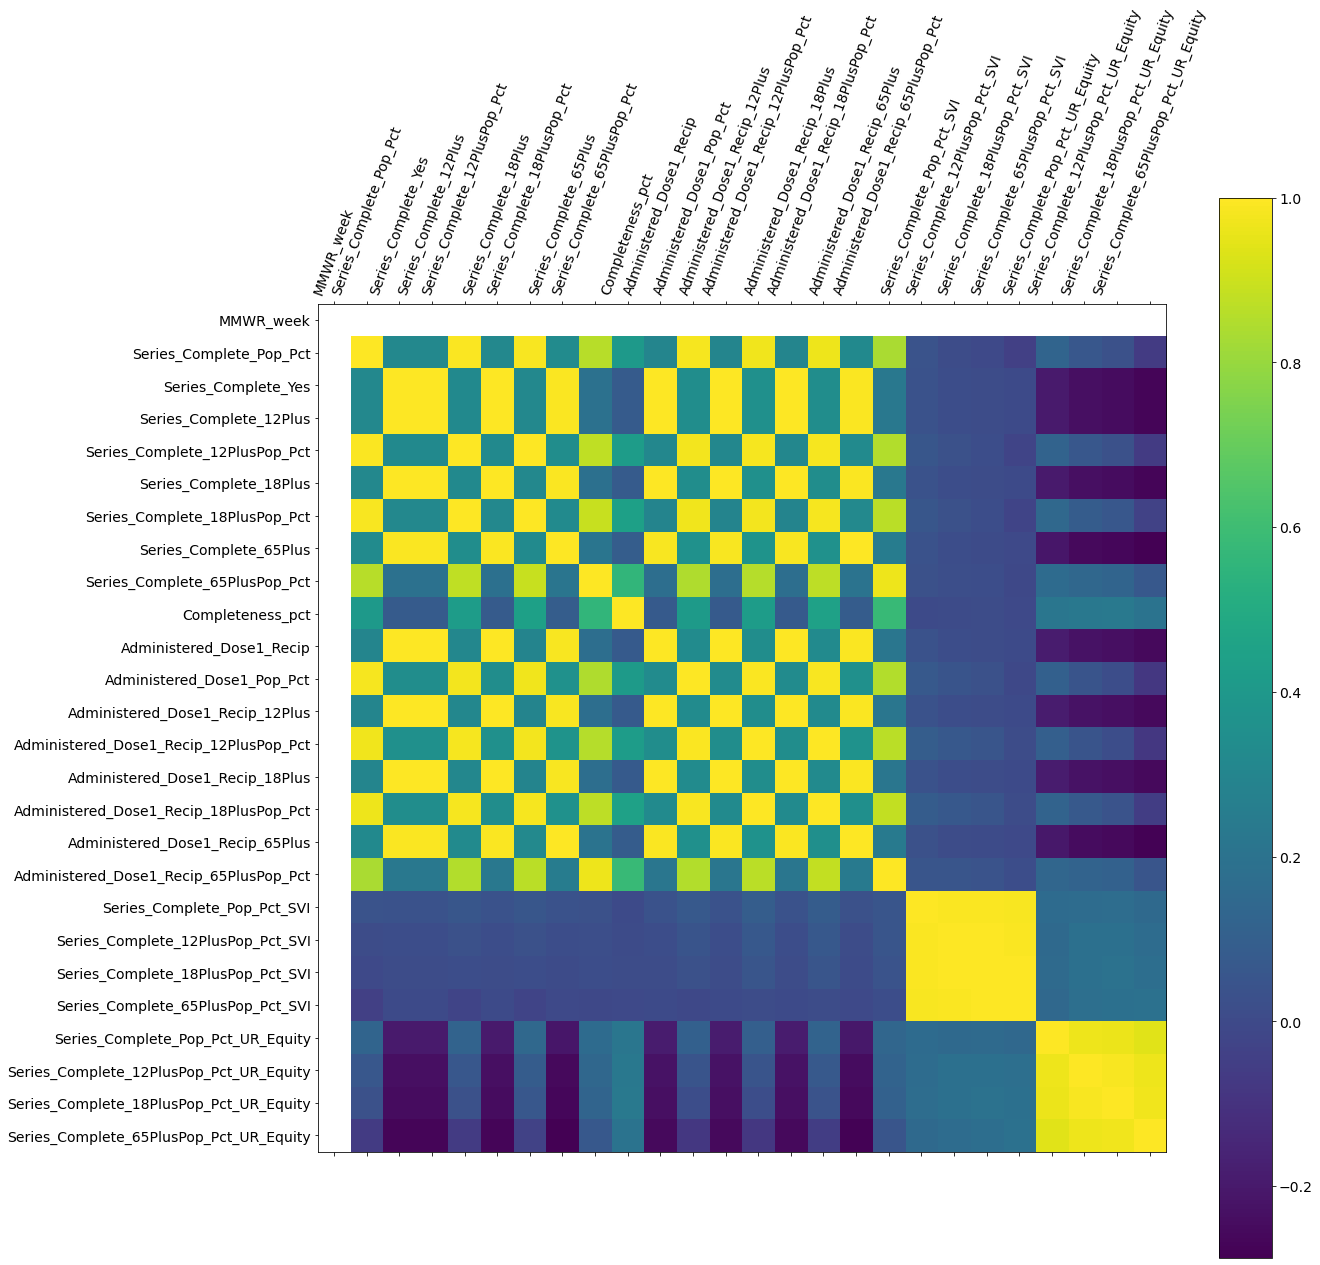

In [47]:
f = plt.figure(figsize=(19, 19))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=70)
plt.yticks(range(data.shape[1]), data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

# 5. Построить графики scatter

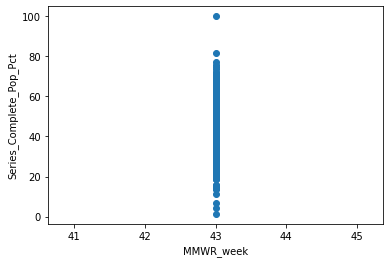

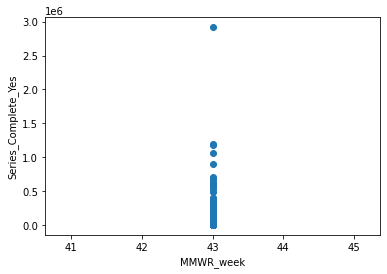

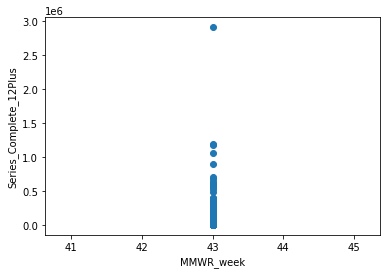

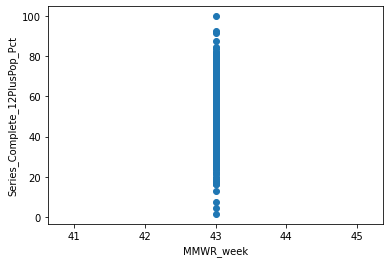

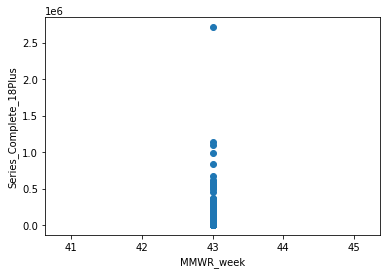

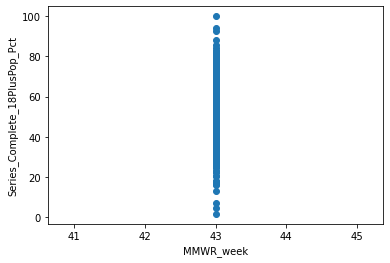

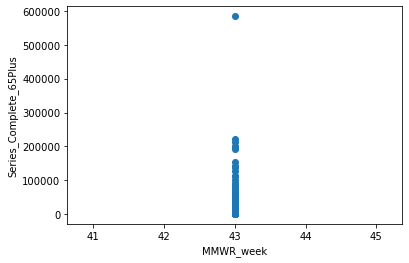

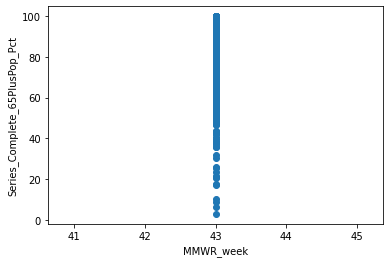

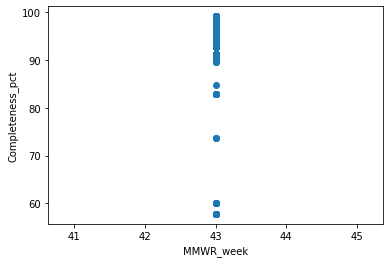

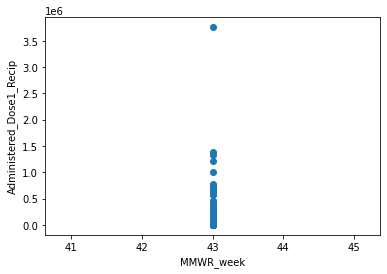

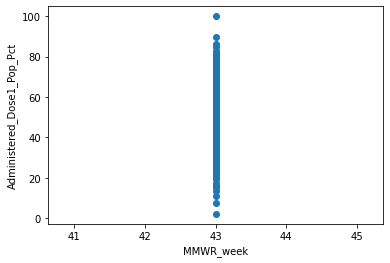

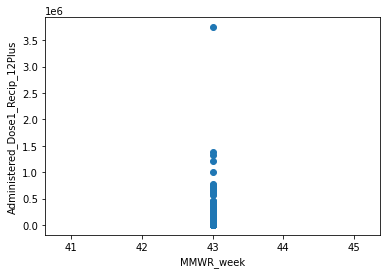

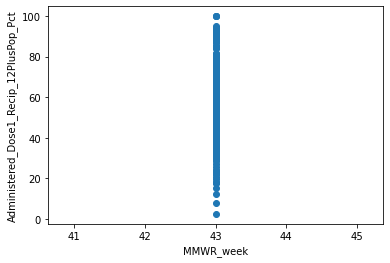

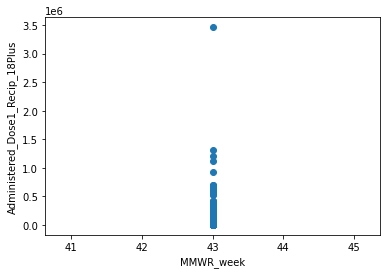

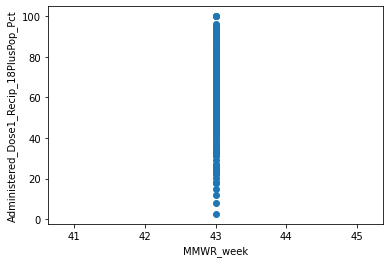

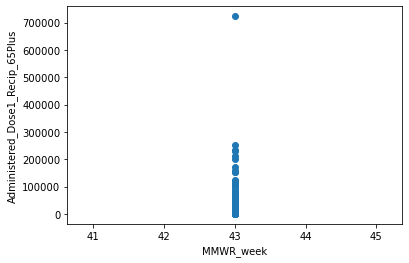

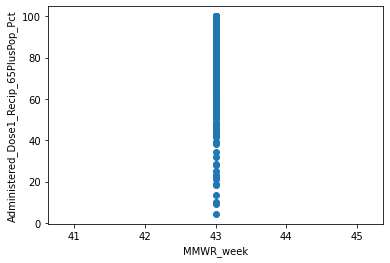

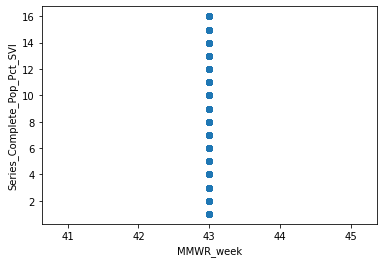

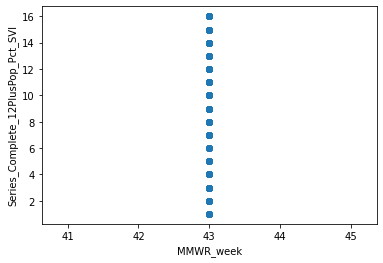

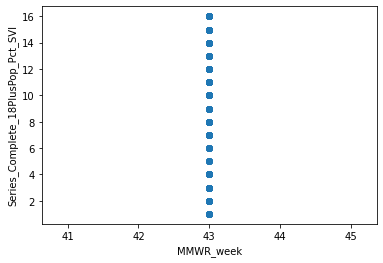

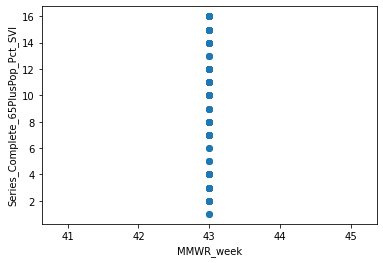

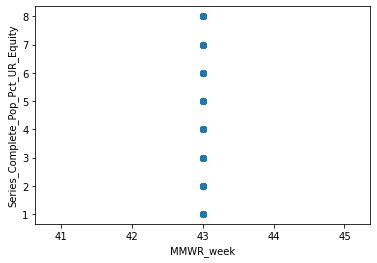

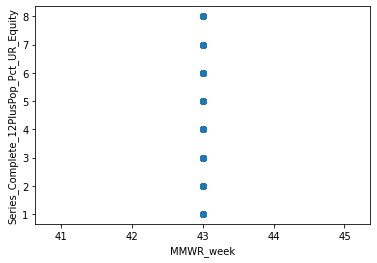

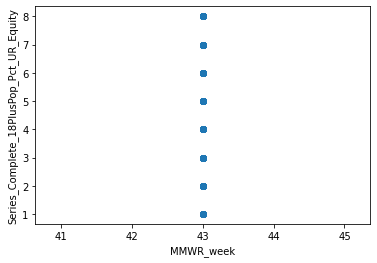

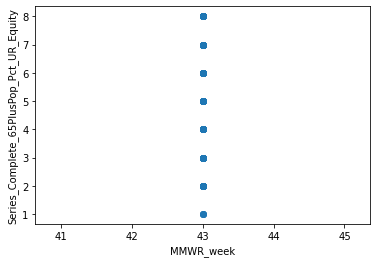

In [48]:
for col in data.drop("MMWR_week", axis=1):
    plt.scatter(data["MMWR_week"], data[col])
    plt.xlabel("MMWR_week")
    plt.ylabel(col)
    plt.show()

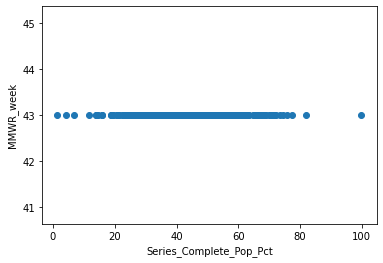

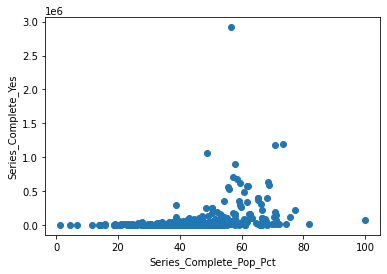

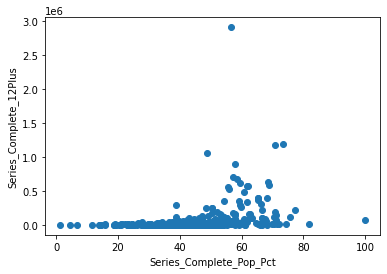

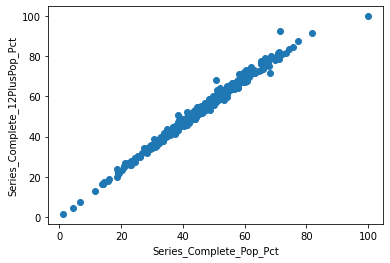

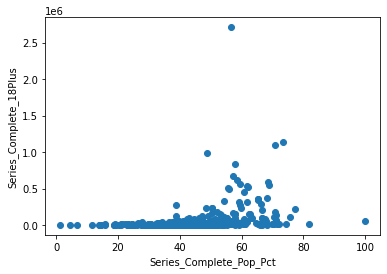

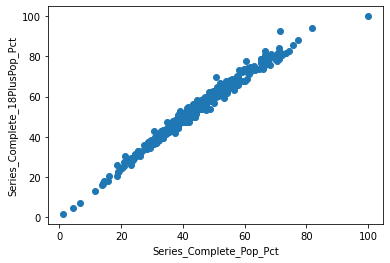

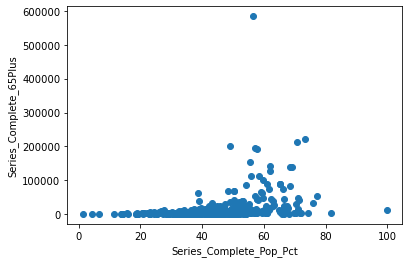

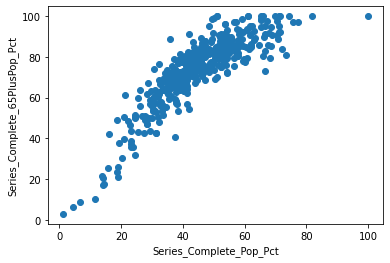

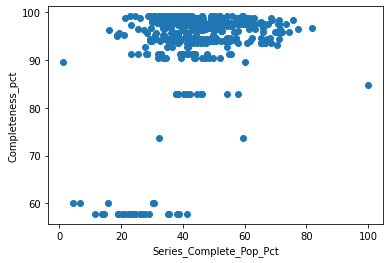

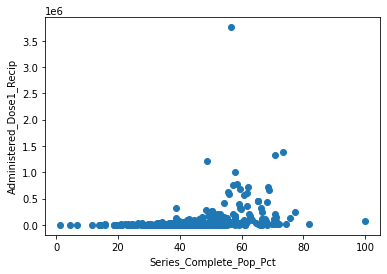

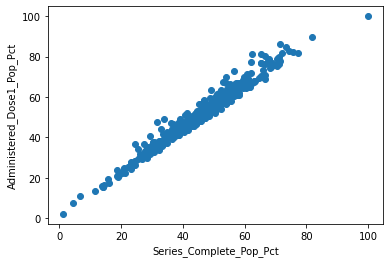

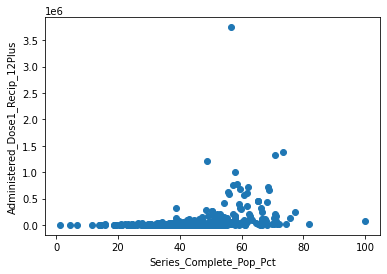

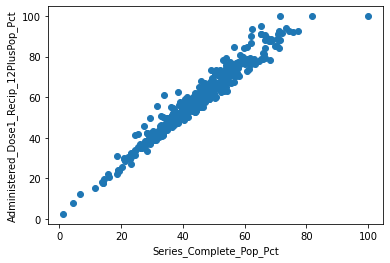

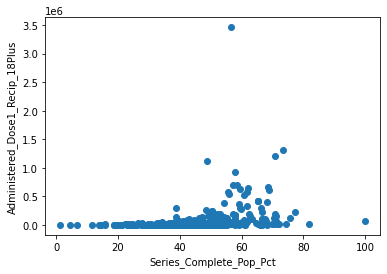

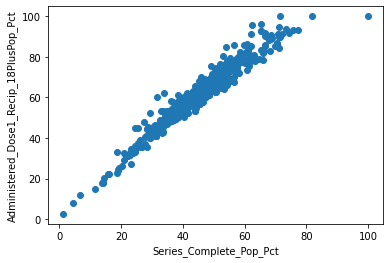

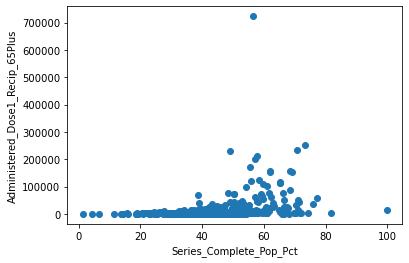

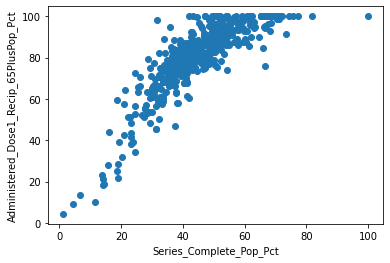

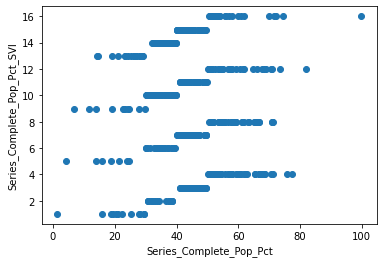

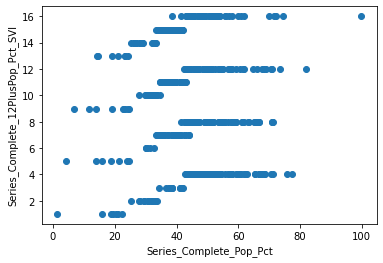

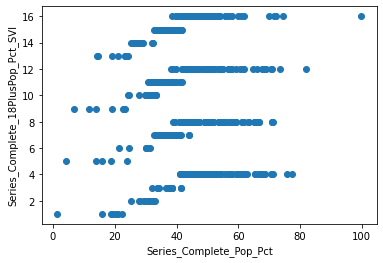

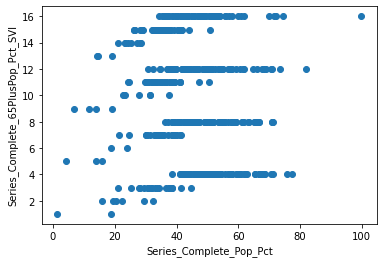

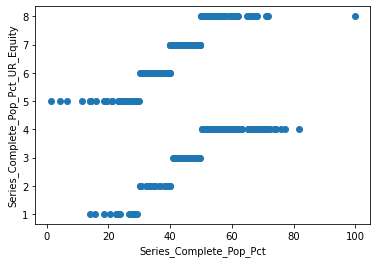

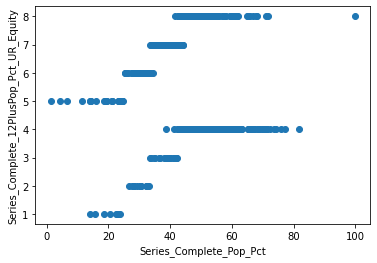

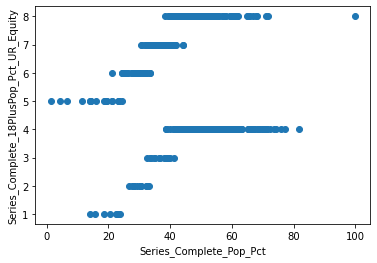

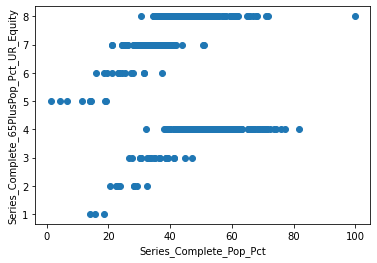

In [49]:
for col in data.drop("Series_Complete_Pop_Pct", axis=1):
    plt.scatter(data["Series_Complete_Pop_Pct"], data[col])
    plt.xlabel("Series_Complete_Pop_Pct")
    plt.ylabel(col)
    plt.show()

# 6. Построить доверительные интервалы для коэффициентов

In [50]:
k = data.drop(["MMWR_week"], axis=1)

sms.DescrStatsW(k).tconfint_mean()

(array([4.31216630e+01, 4.35205470e+04, 4.34997210e+04, 5.02424968e+01,
        4.06346220e+04, 5.22907772e+01, 1.10468262e+04, 7.16789124e+01,
        9.22103948e+01, 4.88627346e+04, 4.88341320e+01, 4.88288577e+04,
        5.68709702e+01, 4.55131986e+04, 5.89870104e+01, 1.22313243e+04,
        7.80880551e+01, 8.62531848e+00, 9.06954543e+00, 9.17950519e+00,
        9.34442414e+00, 5.12263398e+00, 5.56842209e+00, 5.67667954e+00,
        5.84026693e+00]),
 array([4.55097096e+01, 7.93409607e+04, 7.92630067e+04, 5.29531459e+01,
        7.38887854e+04, 5.49998546e+01, 1.83800191e+04, 7.47019155e+01,
        9.40567076e+01, 9.21687992e+04, 5.14395063e+01, 9.20334908e+04,
        5.98248904e+01, 8.55031108e+04, 6.19288937e+01, 2.08478304e+04,
        8.12378708e+01, 9.42696910e+00, 9.88034563e+00, 9.99260810e+00,
        1.01544865e+01, 5.46995861e+00, 5.92177399e+00, 6.03573876e+00,
        6.19894876e+00]))

# 7. Проверить на гетероскедастичность

---



In [51]:
f ='Series_Complete_Yes~Series_Complete_12PlusPop_Pct'
test_data = ols(formula=f, data=data).fit()
white_test = het_white(test_data.resid,  test_data.model.exog)
bp_test = het_breuschpagan(test_data.resid, test_data.model.exog)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']

print(dict(zip(labels, bp_test)))
print(dict(zip(labels, white_test)))

{'LM Statistic': 4.615591725867224, 'LM-Test p-value': 0.03168256238264253, 'F-Statistic': 4.642160647045696, 'F-Test p-value': 0.03171761131630096}
{'LM Statistic': 5.311279225143475, 'LM-Test p-value': 0.07025388902095084, 'F-Statistic': 2.6691685463647588, 'F-Test p-value': 0.07039270764937258}


## Модель гетероскедастична

# 8. Показать метрики регрессии сравнить линейную и нелинейные регрессии

## Линейная

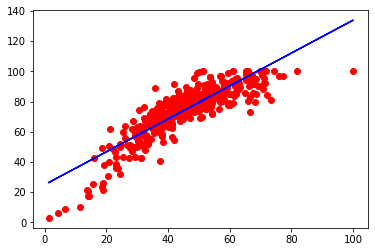

In [52]:
X=data.iloc[:,1:2].values
y=data.iloc[:,8].values

lin_reg=LinearRegression()
lin_reg.fit(X,y)


plt.scatter(X,y,color='red')
plt.plot(X,lin_reg.predict(X),color='blue')
plt.show()

## Нелинейная

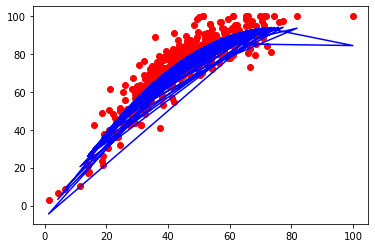

In [53]:
X=data.iloc[:,1:2].values
y=data.iloc[:,8].values

lin_reg=LinearRegression()
lin_reg.fit(X,y)

poly_reg=PolynomialFeatures(degree=2)
X_poly=poly_reg.fit_transform(X)
poly_reg.fit(X_poly,y)
lin_reg2=LinearRegression()
lin_reg2.fit(X_poly,y)

X_grid=np.arange(min(X),max(X),0.1)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg2.predict(poly_reg.fit_transform(X)),color='blue')
plt.show()